In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\sauda\Downloads\Great Learning materials\CSV files\Applied_Stats_company.csv')
data.isna().sum()
data=data.dropna()
data=data.reset_index(drop=True)
print(data.shape)
print(data.info())
data.head()


(446, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         446 non-null    object
 1   Product         446 non-null    object
 2   Funding         446 non-null    object
 3   Event           446 non-null    object
 4   Result          446 non-null    object
 5   OperatingState  446 non-null    object
dtypes: object(6)
memory usage: 21.0+ KB
None


,Startup,Product,Funding,Event,Result,OperatingState
0,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
1,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
2,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
3,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
4,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating


In [2]:
data['Funds']=data['Funding'].apply(lambda x:float(x[1:-1])*0.001 if x[-1]=='K' else (float(x[1:-1])*1000 if x[-1]=='B' else float(x[1:-1])))
data.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds
0,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
1,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
2,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
3,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
4,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


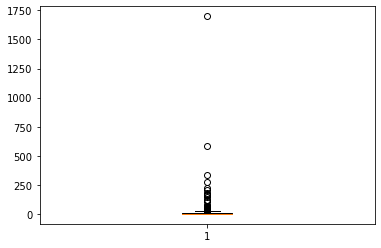

In [3]:
plot = plt.boxplot(data.Funds)
plt.show()

In [4]:
Q2= plot['caps'][1].get_data()[1][1]   
data.drop(data[data.Funds>Q2].index, inplace = True)

C:\Users\sauda\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


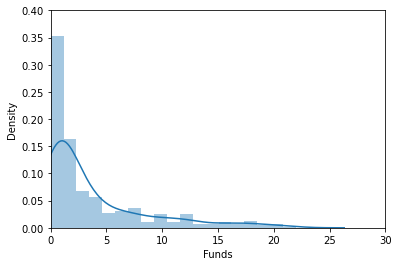

In [5]:
plot=sns.distplot(data.Funds)
plot.set_xlim(0, 30)
plot.set_ylim(0.00,0.4)
plt.show()

C:\Users\sauda\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sauda\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


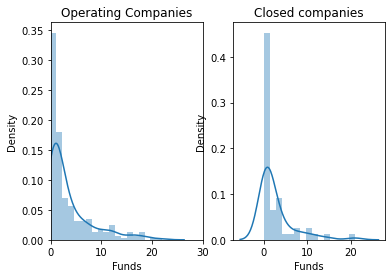

In [6]:
fig, ax = plt.subplots(1, 2)
sns.distplot(data.loc[data.OperatingState == 'Operating', 'Funds'], ax = ax[0])
sns.distplot(data.loc[data.OperatingState =='Closed', 'Funds'], ax = ax[1])
ax[0].set_title('Operating Companies')
ax[0].set_xlim(0,30)
ax[1].set_title('Closed companies')
plt.show()


- Select only the Event that has disrupt keyword from 2013 onwards. [Score: 1 points]
- Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards. [Score: 3 points]
- Plot the distribution plot comparing the 3 city events. [Score: 1 points]

Null hypothesis = There is no difference between the two means, 
Alternate hypothesis = There is difference between the two means

In [7]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
Operating = data.loc[data.OperatingState == 'Operating', 'Funds']
Closed= data.loc[data.OperatingState =='Closed', 'Funds']
alpha = 0.05  
test_statistic, p_value = ztest(Operating,Closed)

if p_value <= alpha:
    print({round(p_value, 3)} < {alpha},'reject the Null hypothesis')
else:
    print({round(p_value,3)} > {alpha},'we fail to reject the Null hypothesis')

test_statistic_t, p_value_t = ztest(Operating,Closed)
if p_value <= alpha:
    print({round(p_value_t, 3)} < {alpha},'reject the Null hypothesis')
else:
    print({round(p_value_t,3)} > {alpha},'we fail to reject the Null hypothesis')
    

False we fail to reject the Null hypothesis
False we fail to reject the Null hypothesis


In [8]:
df1=data
df1.Result.value_counts()

Contestant         282
Finalist            52
Audience choice     20
Winner              17
Runner up           15
Name: Result, dtype: int64

In [9]:
a = len(df1)
b = df1.Result.value_counts()['Contestant']

In [10]:
contestants= df1.OperatingState[df1.Result == 'Contestant'].value_counts()['Operating']
winners= df1.OperatingState[df1.Result != 'Contestant'].value_counts()['Operating']

winners/a, contestants/b

(0.20984455958549222, 0.6879432624113475)

Null hyputhesis=The proportion of companies that are operating is the same - winners and contestants,
Alternative hypothesis= The proportion of companies that are operating is different from each other.

In [11]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants, winners], [a,b])

if p_value <= alpha:
    print({round(p_value, 3)} < {alpha} ,", reject the Null hypothesis")
else:
    print({round(p_value,3)} > {alpha},", fail to reject the Null hypothesis")

False , reject the Null hypothesis


##### Conclusion
- funds a company raises is not a deciding factor in if the company will remain operational or not
- winners are operational most of the times, than  companies who entered as contestants

In [12]:
df1[df1.Event.apply(lambda x: 'Disrupt' in x)].Event.value_counts()

Disrupt NY 2015         21
Disrupt SF 2014         19
Disrupt SF 2013         19
Disrupt NYC 2012        19
Disrupt SF 2011         19
Disrupt NYC 2013        19
Disrupt SF 2015         19
Disrupt SF 2016         17
Disrupt NY 2016         16
Disrupt NYC 2011        15
Disrupt NYC 2014        15
Disrupt SF 2012         15
Disrupt SF 2010         13
Disrupt London 2015     11
Disrupt London 2016     10
Disrupt EU 2014         10
Disrupt NYC 2010        10
Disrupt EU 2013          9
Disrupt Beijing 2011     4
Name: Event, dtype: int64

 We have considered only the "Disrupt" events
 data for the EU only from 2013,Hence we should drop the records pertaining to events earlier than 2013

In [15]:
events = df1[df1.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2012)].Event  
events

0         Disrupt NYC 2013
1          Disrupt NY 2016
6          Disrupt SF 2015
7      Disrupt London 2016
9          Disrupt SF 2015
              ...         
427        Disrupt NY 2015
430       Disrupt NYC 2013
431        Disrupt SF 2014
435    Disrupt London 2015
444        Disrupt SF 2013
Name: Event, Length: 185, dtype: object

# 

In [16]:
df1.columns

Index(['Startup', 'Product', 'Funding', 'Event', 'Result', 'OperatingState',
       'Funds'],
      dtype='object')

In [18]:
NY = df1.loc[events[events.apply(lambda x: 'NY' in x)].index, 'Funds']
SF= df1.loc[events[events.apply(lambda x: 'SF' in x)].index, 'Funds']
EU= df1.loc[events[events.apply(lambda x: 'EU' in x or 'London' in x)].index, 'Funds']
print(len(NY), len(SF), len(EU))

71 74 40




**Null Hypothesis(Ho)**: Average funds raised by companies across three cities are the same 

**Alternative Hypothesis(Ha)**: Average funds raised by companies across three cities are the different

##### Plot the distribution plot comparing the 3 city events. 

C:\Users\sauda\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sauda\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sauda\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

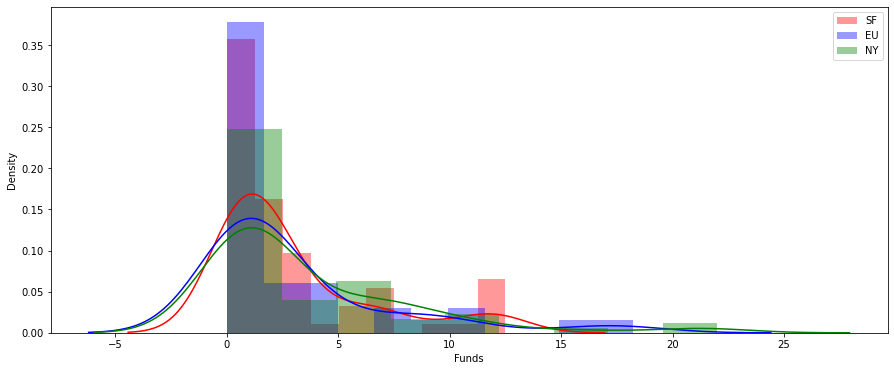

In [20]:
plt.figure(figsize=(15,6))
sns.distplot(SF, color = 'red', label = 'SF')
sns.distplot(EU, color = 'blue', label = 'EU')
sns.distplot(NY, color = 'green', label = 'NY')
plt.legend()
plt.show()

- Dispersion in NY is high comparitively
- distributions look quiet similar



In [22]:
from scipy.stats import f_oneway


a,p_value = f_oneway(NY, SF, EU)

if p_value <= alpha:
    print({round(p_value_t, 3)} < {alpha},'reject the Null hypothesis')
else:
    print({round(p_value_t,3)} > {alpha},'we fail to reject the Null hypothesis')
    



False we fail to reject the Null hypothesis
